In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import itertools
import pickle

%matplotlib inline

In [5]:
pickle_file = open('campusDemand.pkl','rb')
pickled_data = pickle.load(pickle_file)
pickle_file.close()

# Since we pickled them all together as a list, I'm going to assign each element of the list to the same variable
# we had been using before:
data = pickled_data[0]
pointNames = pickled_data[1]
data_by_day = pickled_data[2]
idx = pickled_data[3]

In [6]:
data['Point name'].value_counts()

# data['Point name'== Electric kW Calculations - Main Campus kW]

ek=data.loc[data['Point name'] == 'Electric kW Calculations - Main Campus kW']

ek = ek.drop(ek.columns[0],axis=1)

ek[['Time','Value']]

,Time,Value
152348,2013-11-10 00:00:30,8367.816250
152349,2013-11-10 00:01:30,8287.111375
152350,2013-11-10 00:02:30,8340.608125
152351,2013-11-10 00:03:30,8342.061625
152352,2013-11-10 00:04:30,8341.360375
152353,2013-11-10 00:05:30,8343.680875
152354,2013-11-10 00:06:30,8335.307125
152355,2013-11-10 00:07:30,8294.368000
152356,2013-11-10 00:08:30,8327.415375
152357,2013-11-10 00:09:30,8287.635875


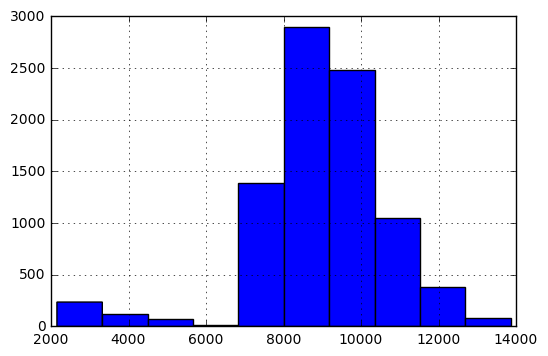

In [7]:
ek_2 = ek.set_index('Time')

ek_2.index=pd.to_datetime(ek_2.index)

ek_hourly = ek_2.resample('H').mean()

ek_hourly['Value'].hist()

In [8]:
ek_2.resample('D').mean()

,Value
Time,
2013-11-10,8393.388868
2013-11-11,9099.672082
2013-11-12,9022.590643
2013-11-13,9110.351568
2013-11-14,9062.693597
2013-11-15,8891.615189
2013-11-16,8620.645746
2013-11-17,8715.570087
2013-11-18,9021.979361


In [9]:
ek_2.index.dayofweek

array([6, 6, 6, ..., 0, 0, 0], dtype=int32)

In [10]:
ek['Weekday']=ek['Time'].dt.dayofweek

ek_3 = ek

del ek['Weekday']


In [11]:
ek_3['Weekday']=ek['Time'].dt.dayofweek

In [12]:
Mondays = ek_3[ek_3['Weekday'] ==0 ]
Tuesdays = ek_3[ek_3['Weekday'] ==1 ]
Wednesdays = ek_3[ek_3['Weekday'] ==2 ]
Thursdays = ek_3[ek_3['Weekday'] ==3 ]
Fridays = ek_3[ek_3['Weekday'] ==4 ]
Saturdays = ek_3[ek_3['Weekday'] ==5 ]
Sundays = ek_3[ek_3['Weekday'] ==6 ]

In [13]:
type(Mondays)

pandas.core.frame.DataFrame

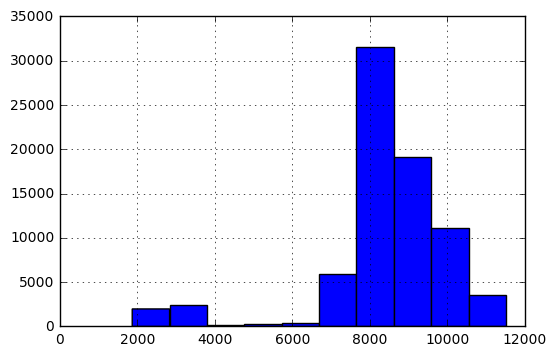

In [14]:
Sunday = Sundays.set_index('Time')

Sunday.resample('H').mean()

Sunday['Value'].hist()

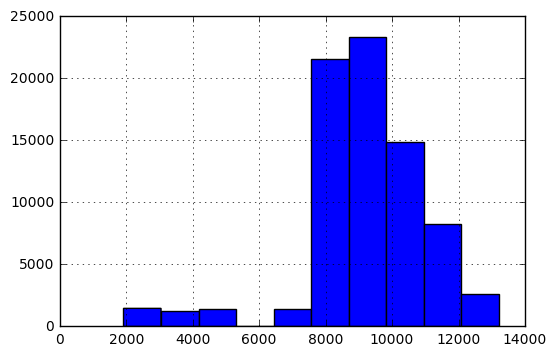

In [15]:
Monday = Mondays.set_index('Time')

Monday.resample('H').mean()

Monday['Value'].hist()

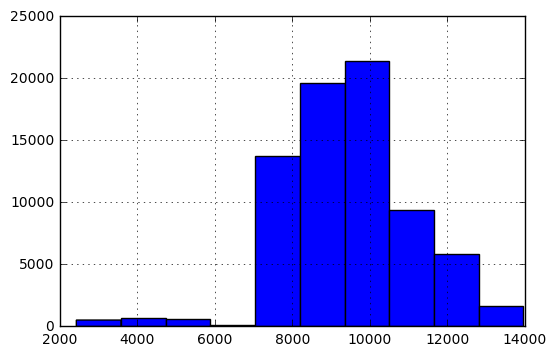

In [16]:
Tuesday = Tuesdays.set_index('Time')

Tuesday.resample('H').mean()

Tuesday['Value'].hist()

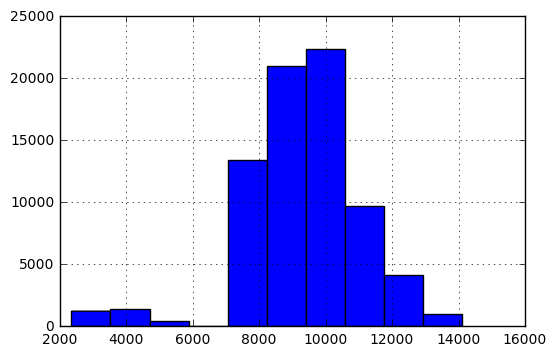

In [17]:
Wednesday = Wednesdays.set_index('Time')

Wednesday.resample('H').mean()

Wednesday['Value'].hist()

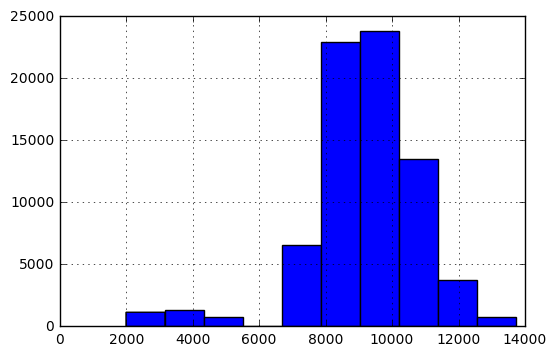

In [18]:
Thursday = Thursdays.set_index('Time')

Thursday.resample('H').mean()

Thursday['Value'].hist()

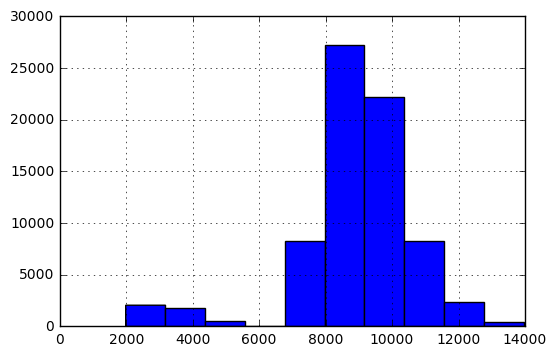

In [19]:
Friday = Fridays.set_index('Time')

Friday.resample('H').mean()

Friday['Value'].hist()

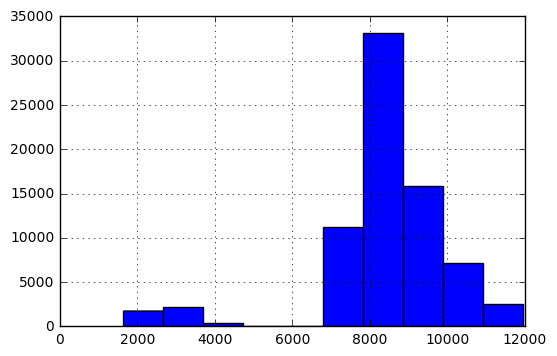

In [20]:
Saturday = Saturdays.set_index('Time')

Saturday.resample('H').mean()

Saturday['Value'].hist()

In [21]:
DayDictionary = {0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}

In [37]:
# for i in range(0,7):
#     a=DayDictionary[i]
#     if i ==0:
#         Monday['Value'].hist()
        
#     if i==1:
#         Tuesday['Value'].hist()
        
#     if i==2:
#         Wednesday['Value'].hist()
        
#     if i==3:
#         Thursday['Value'].hist()
        
#     if i==4:
#         Friday['Value'].hist()
        
#     if i==5:
#         Saturday['Value'].hist()
        
#     if i==6:
#         Sunday['Value'].hist()

$$ Box-Plots $$

In [43]:
ek_4 = ek_2.resample('H').mean()

ek_4['Weekday']=ek['Time'].dt.dayofweek

del ek_4['Weekday']

In [44]:
ek_4.resample('H').mean()

,Value
Time,
2013-11-10 00:00:00,8261.731944
2013-11-10 01:00:00,8131.553229
2013-11-10 02:00:00,7985.570644
2013-11-10 03:00:00,7912.394148
2013-11-10 04:00:00,7857.923992
2013-11-10 05:00:00,7862.010058
2013-11-10 06:00:00,7885.617094
2013-11-10 07:00:00,7856.087542
2013-11-10 08:00:00,7878.690183


In [40]:
times = pd.to_datetime(ek_4.index)
ek_4.groupby([times.hour, times.minute]).Value.mean()

0   0    8466.881811
1   0    8340.925600
2   0    8217.128429
3   0    8137.314850
4   0    8095.065495
5   0    8093.934045
6   0    8169.771496
7   0    8290.853731
8   0    8646.990926
9   0    9057.459087
10  0    9402.380325
11  0    9620.075722
12  0    9740.696725
13  0    9845.207627
14  0    9918.497261
15  0    9909.865290
16  0    9797.720276
17  0    9539.877198
18  0    9334.730762
19  0    9191.321138
20  0    9079.653961
21  0    8922.710587
22  0    8754.948620
23  0    8615.376134
Name: Value, dtype: float64

In [ ]:
# ek_4.boxplot()
# for i in range(0,24): 

In [41]:
hours = ek_4.index.hour

hours

array([ 0,  1,  2, ..., 20, 21, 22], dtype=int32)

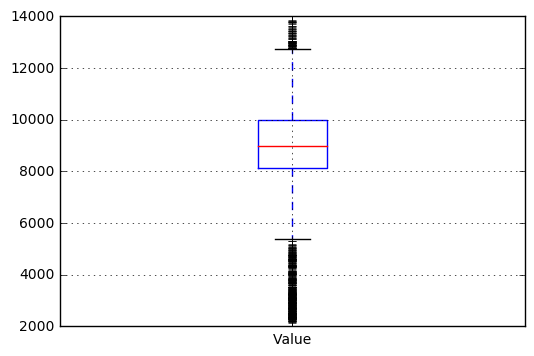

In [45]:
ek_4.boxplot()

<Container object of 3 artists>

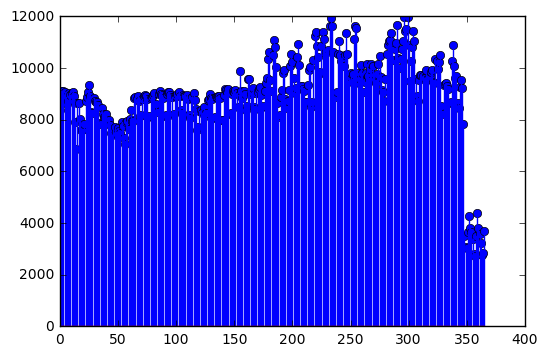

In [61]:
ek_5=ek_4.resample('D').mean()

ek_5

plt.stem(ek_5)